# Duncan's Multiple Range Test 

This notebook serves as a comprehensive guide to using the `duncans_test` package. It covers various use cases and demonstrates the package's plotting functionality.

In [ ]:
# Install the duncans_test package directly from GitHub.
! pip install git+https://github.com/Ashutosh278/duncans-mrt.git

# Import the dedicated plotting functions from the plots module.
from duncans_test import duncan_test, plot_bar, plot_cld, plot_heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Example 1: Analysis from Raw Data and ANOVA Table

This is the most common and statistically sound way to perform the test. It uses your complete dataset and a pre-calculated ANOVA table to ensure all necessary statistical parameters are handled correctly.

In [7]:

# Create sample raw data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(10, 2, 5),    # Treatment A
    np.random.normal(15, 2, 5),    # Treatment B  
    np.random.normal(12, 2, 5),    # Treatment C
    np.random.normal(18, 2, 5),    # Treatment D
    np.random.normal(11, 2, 5),    # Treatment E
    np.random.normal(17, 2, 5),    # Treatment F
  
])
groups = ['A']*5 + ['B']*5 + ['C']*5 + ['D']*5 + ['E']*5 + ['F']*5

# Create DataFrame
df = pd.DataFrame({'value': data, 'treatment': groups})
print("Raw Data:")
print(df.head(10))

# Perform ANOVA (using statsmodels for example)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('value ~ C(treatment)', data=df).fit()
anova_table = anova_lm(model)
print(anova_table)

# Run Duncan's test with raw data + ANOVA table
results1 = duncan_test(data=df['value'], groups=df['treatment'], 
                      anova_table=anova_table, alpha=0.05)
print(results1)

Raw Data:
       value treatment
0  10.993428         A
1   9.723471         A
2  11.295377         A
3  13.046060         A
4   9.531693         A
5  14.531726         B
6  18.158426         B
7  16.534869         B
8  14.061051         B
9  16.085120         B
                df      sum_sq   mean_sq          F        PR(>F)
C(treatment)   5.0  240.293400  48.05868  18.407999  1.617266e-07
Residual      24.0   62.657997   2.61075        NaN           NaN
                 Duncan's Multiple Range Test Results                 
Test Parameters:
 α = 0.050 | dfₑ = 24 | MSₑ = 2.611 | CV = 12.01%

Critical Ranges:
--------------------------
Step   Tprob    Duncan  
--------------------------
2      2.919    2.109   
3      3.066    2.215   
4      3.160    2.283   
5      3.226    2.331   
6      3.276    2.367   

Treatment Groups:
------------------------
Treatment  Mean    Group
------------------------
D          16.568  a    
F          16.377  a    
B          15.874  a    
A         

#### HTML Output
In a Jupyter notebook, simply calling the object will render a beautiful HTML table

In [ ]:
# The table is dynamically formatted for easy viewing.
results1

Step,Tprob,Duncan
2,2.919,2.109
3,3.066,2.215
4,3.160,2.283
5,3.226,2.331
6,3.276,2.367
Treatment,Mean,Group
D,16.568a,a
F,16.377a,a
B,15.874a,a
A,10.918b,b


### Sorting Options for the Output Table
The output table can be sorted by mean (descending, the default) or in sequential order (based on your input). This flexibility is useful for different presentation styles.

In [10]:

# Compare sorting options
results_mean = duncan_test(data=df['value'], groups=df['treatment'],
                          anova_table=anova_table, sorting='mean')

results_seq = duncan_test(data=df['value'], groups=df['treatment'],
                         anova_table=anova_table, sorting='sequential')

print("Mean-sorted order (default):")
print(results_mean.grouping)
print("\nSequential (input) order:")
print(results_seq.grouping)


Mean-sorted order (default):
                Mean Group
treatment                 
D          16.567520     a
F          16.377318     a
B          15.874238     a
A          10.918006     b
E          10.735308     b
C          10.269847     b

Sequential (input) order:
                Mean Group
Treatment                 
A          10.918006     b
B          15.874238     a
C          10.269847     b
D          16.567520     a
E          10.735308     b
F          16.377318     a


## Example 2: Precomputed Means

When you already have calculated means and know the error terms from previous analysis. Useful for meta-analysis or when working with published results.

In [ ]:
# Precomputed means from a different, larger dataset.
means = [10.2, 15.1, 12.3, 18.4, 11.5, 17.6, 13.8, 12.9]
treatments = ['A', 'B', 'C', 'D','E', 'F','G', 'I']

# Assume equal replication (3 replicates per treatment).
n_rep = 3
ms_error = 2.4      # Mean Square Error from a previous analysis
df_error = 16       # Degrees of Freedom from that analysis

# Run the test using the precomputed values.
results = duncan_test(
    data=means, 
    groups=treatments,
    n_rep=n_rep, 
    ms_error=ms_error,  
    df_error=df_error, 
    alpha=0.05
)

print(results)

                 Duncan's Multiple Range Test Results                 
Test Parameters:
 α = 0.050 | dfₑ = 16 | MSₑ = 2.400 | CV = 11.09%

Critical Ranges:
--------------------------
Step   Tprob    Duncan  
--------------------------
2      2.998    2.681   
3      3.144    2.812   
4      3.235    2.893   
5      3.297    2.949   
6      3.343    2.990   
7      3.376    3.020   
8      3.402    3.043   

Treatment Groups:
------------------------
Treatment  Mean    Group
------------------------
D          18.400  a    
F          17.600  ab   
B          15.100  bc   
G          13.800  cd   
I          12.900  cde  
C          12.300  cde  
E          11.500  de   
A          10.200  e    

Treatments with the same letter are not significantly different


##  Visualizing the Results
The package includes built-in functions for generating beautiful, publication-ready plots. You can generate bar plots, Compact Letter Displays (CLD), and heatmaps of pairwise p-values.

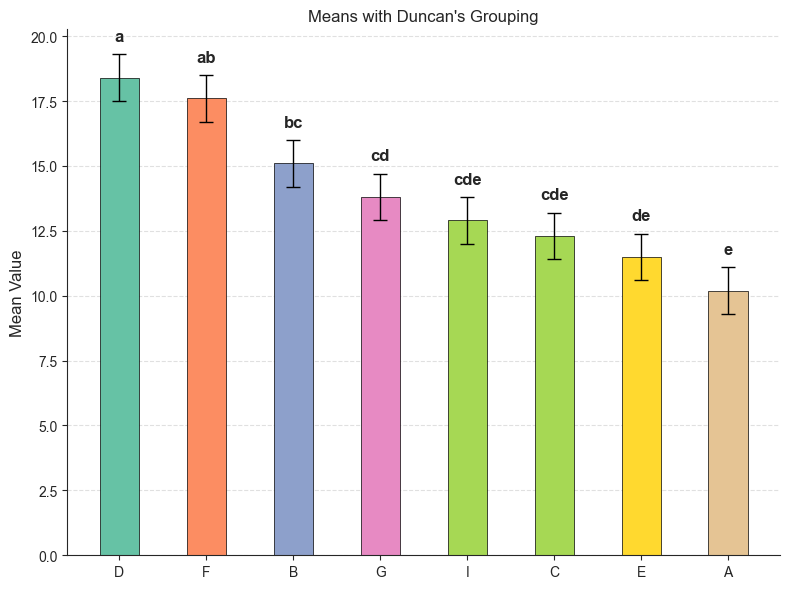

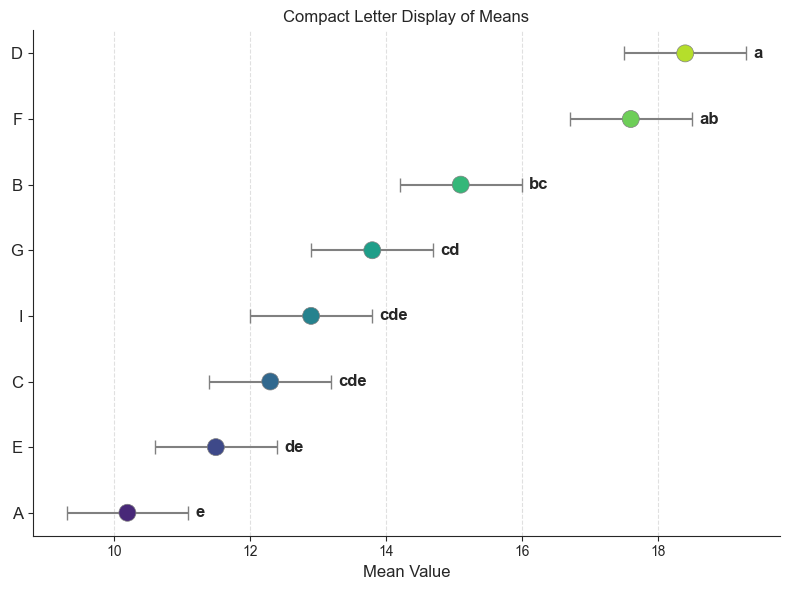

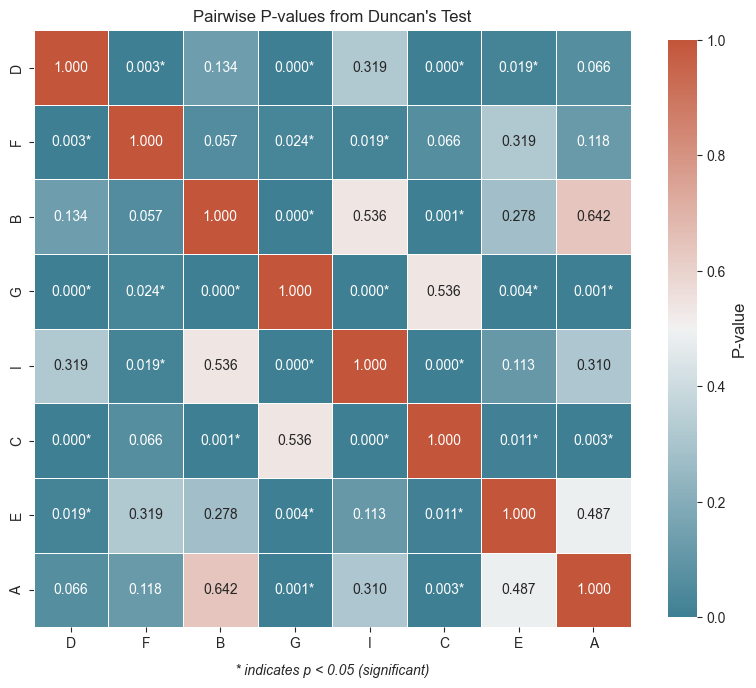

In [ ]:
# Use the results from Example 2 for plotting.
print("Generating Plots from Example 2 results:")

# A bar plot of means with error bars and grouping letters.
# The title and labels are automatically added by the function.
plot_bar(results)
plt.show()

# A Compact Letter Display (CLD) for a different visual perspective.
plot_cld(results)
plt.show()

# A heatmap of all pairwise p-values, making it easy to see significant differences.
plot_heatmap(results)
plt.show()

### Example 3: Unequal Replication

This example shows how the function automatically handles unequal sample sizes by using the harmonic mean to calculate the standard error.

In [ ]:
# Data with unequal sample sizes.
means_unequal = [10.2, 15.1, 12.3, 18.4]
treatments_unequal = ['A', 'B', 'C', 'D']
n_rep_unequal = [4, 6, 5, 3]  # Different sample sizes per treatment

ms_error_unequal = 4.0
df_error_unequal = 16

results_unequal = duncan_test(
    data=means_unequal, 
    groups=treatments_unequal,
    n_rep=n_rep_unequal, 
    ms_error=ms_error_unequal,
    df_error=df_error_unequal, 
    alpha=0.05
)

print(results_unequal)
print(f"Sample sizes: {n_rep_unequal}")

                 Duncan's Multiple Range Test Results                 
Test Parameters:
 α = 0.050 | dfₑ = 16 | MSₑ = 4.000 | CV = 14.51%

Critical Ranges:
--------------------------
Step   Tprob    Duncan  
--------------------------
2      2.998    2.922   
3      3.144    3.064   
4      3.235    3.153   

Treatment Groups:
------------------------
Treatment  Mean    Group
------------------------
D          18.400  a    
B          15.100  b    
C          12.300  bc   
A          10.200  c    

Treatments with the same letter are not significantly different
Sample sizes: [4, 6, 5, 3]


## Conclusion

This package provides a complete and user-friendly implementation of Duncan's Multiple Range Test, perfect for a wide range of research applications.

- ✅ **Flexible Inputs**: Accepts both raw data (with ANOVA tables) and precomputed means.
- ✅ **Automated Handling**: Correctly handles unequal replication and missing data points.
- ✅ **Customizable Outputs**: Offers multiple sorting options for the results table.
- ✅ **Visualizations**: Includes high-quality bar plots, CLD plots, and heatmaps to visualize your findings.
- ✅ **Export-Ready**: The output is designed for easy inclusion in scientific reports and publications.
